In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

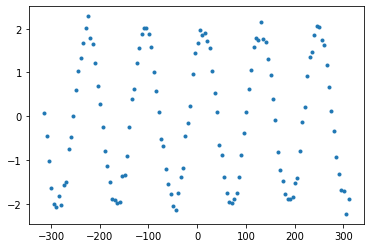

In [2]:
df = pd.read_csv('./datos.csv')
X = df['x'].values
Y = df['y'].values

plt.figure()
plt.plot(X,Y, '.')
plt.show()

$$f(x) = A\sin(Bx+C\pi) \\ P = [A, B, C]$$

In [3]:
def objective_function(P, X, Y):
    A, B, C = P[0], P[1], P[2]
    Yp = A*np.sin(B*X + C*np.pi)
    return np.sum(np.abs(Y-Yp))

In [4]:
def draw_solution(P, X, Y):
    A, B, C = P[0], P[1], P[2]
    Yp = A*np.sin(B*X + C*np.pi)

    plt.figure()
    plt.plot(X, Y, '.')
    plt.plot(X, Yp)
    plt.show()

643.4350369300294


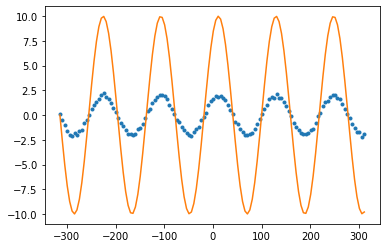

In [5]:
# TEST CASE

P = [10,10,10]
print(objective_function(P, X, Y))
draw_solution(P, X, Y)

### Scipy Differential Evolution

In [6]:
from scipy.optimize import differential_evolution

In [7]:
bounds = [   [-100, 100],    # Rango de A
            [-100, 100],    # Rango de B
            [-100, 100] ]   # Rango de C

In [8]:
res = differential_evolution(objective_function, bounds, args=(X,Y))
res

     fun: 10.652257570446059
     jac: array([  2.60163395, 167.19268528,   2.87773905])
 message: 'Optimization terminated successfully.'
    nfev: 9010
     nit: 197
 success: True
       x: array([  1.99392734, -74.19472749,  38.53147965])

10.652257570446059


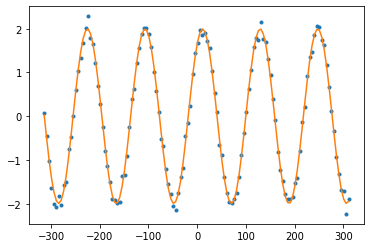

In [9]:
print(objective_function(res.x, X, Y))
draw_solution(res.x, X, Y)

### Evolutionary Programming from Scratch

In [10]:
from evolutionary_programming import evolutionary_programming

In [15]:
chrom, score = evolutionary_programming(objective_function, bounds, args=(X,Y), niter=1000)

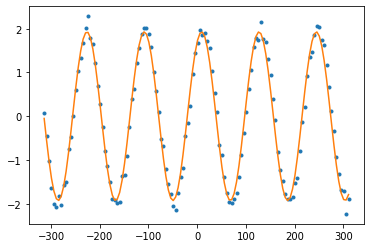

In [16]:
draw_solution(chrom, X, Y)